## 0. Data Ingestion, Premliminary Data Analysis

In [105]:
#import ncessary libaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [106]:
# load dataset through url
train_url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

test_url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"


df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

In [107]:
# create a copy of the dataset
df_copy = df_train.copy()

In [108]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [109]:
# set loant_id as inndex
df_train.set_index("Loan_ID", inplace=True)

In [110]:
# check the column names
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [111]:
# check the  basic information of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [112]:
# check for missing values
df_train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [113]:
# handle missing values in numerical columns

 # extracts numerical columns
num_cols = df_train.select_dtypes(include=["float64","int64"]).columns 

# check for missing values
df_train[num_cols].isna().sum()

# fill the  missing values in numerical columns with median
df_train.loc[:, num_cols] = df_train[num_cols].fillna(df_train[num_cols].median())  

# # recheck for missing values
df_train[num_cols].isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [114]:
# # handle missing values in categorical columns

# # extracts categorical column
cat_cols = df_train.select_dtypes(include="object").columns 


# # check for missing values
# df_train[cat_cols].isna().sum()

# get the mode of the columns
modes = df_train[cat_cols].apply(lambda x: x.value_counts().index[0])

# fill the missing values in the catgorical columns with modes
df_train[cat_cols] = df_train[cat_cols].fillna(modes)


# rechecck the missing values
df_train[cat_cols].isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [115]:
# check for duplicates
df_train.duplicated().sum()

np.int64(0)

In [116]:
# get the descriptive analysis for the numwercal columns
num_cols = df_train.select_dtypes(include=["float64","int64"]).columns
df_train[num_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


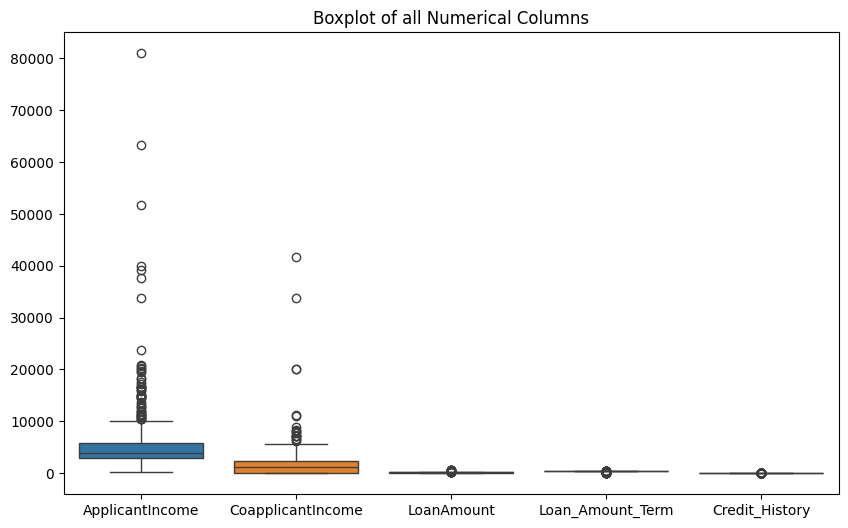

In [117]:
# check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df_train[num_cols])
plt.title("Boxplot of all Numerical Columns")
plt.show()


In [118]:
# # handle outliers
# def handle_outliers(data, col):
#     Q1 = data.quantile(0.25)
#     Q3 = series.quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - (1.5 * IQR)
#     upper = Q3 - (1.5 * IQR)
#     return np.clip(series, lower, upper)

# # apply to numerical categorizes
# df_train[num_cols] = df_train[num_cols].apply(handle_outliers)

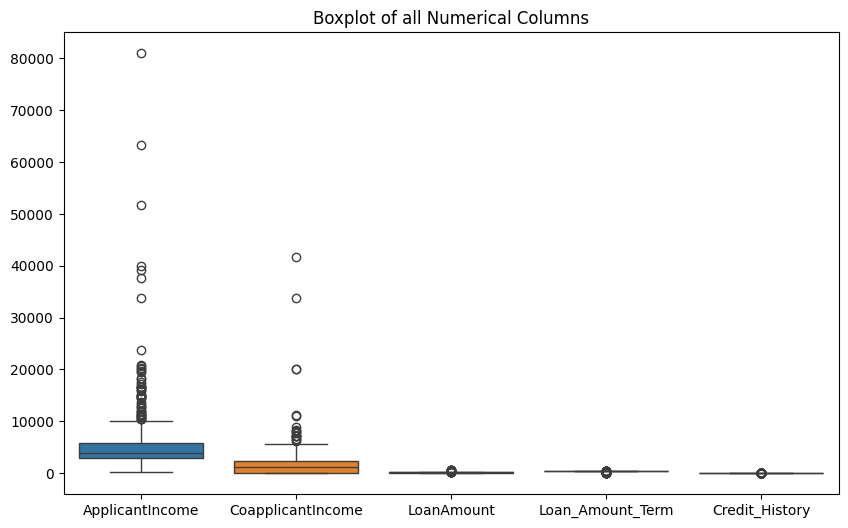

In [119]:
# recheck for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df_train[num_cols])
plt.title("Boxplot of all Numerical Columns")
plt.show()


In [120]:
# get the descriptive analysis for the numwercal columns
num_cols = df_train.select_dtypes(include=["float64","int64"]).columns
df_train[num_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


----------------------------------------------------------------
 ### **1. Univariate analysis**
 ---------------------------------------------------------------
 

In [121]:
def univarte_numerical_eda(df, column):
    """ Performs a univarate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")
    
    plt.figure(figsize=(12,4))
    
    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color="teal")
    plt.title(f"\n Distribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color="teal")
    plt.title(f"\n Boxplot of {column}", fontsize=13)
    
    plt.tight_layout()
    plt.show()
    
    
      # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")
    

 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000

Skewness: 6.540
Kurtosis: 60.541


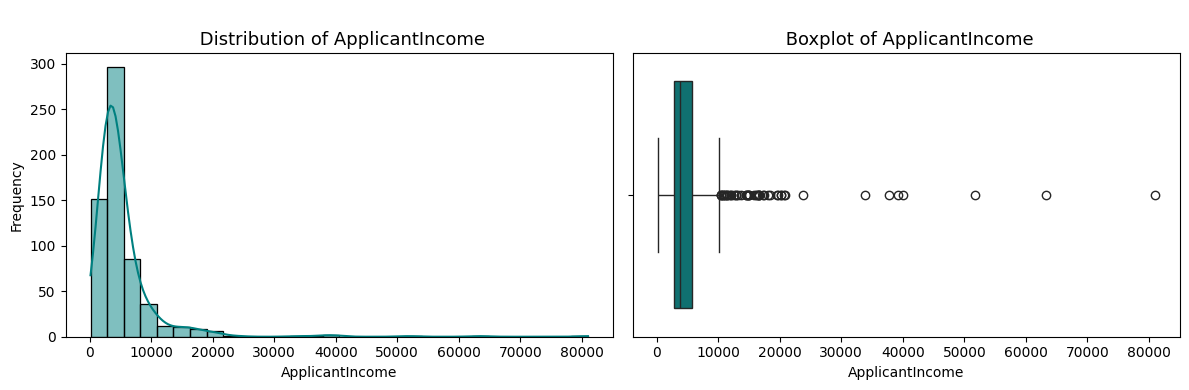


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000

Skewness: 7.492
Kurtosis: 84.956


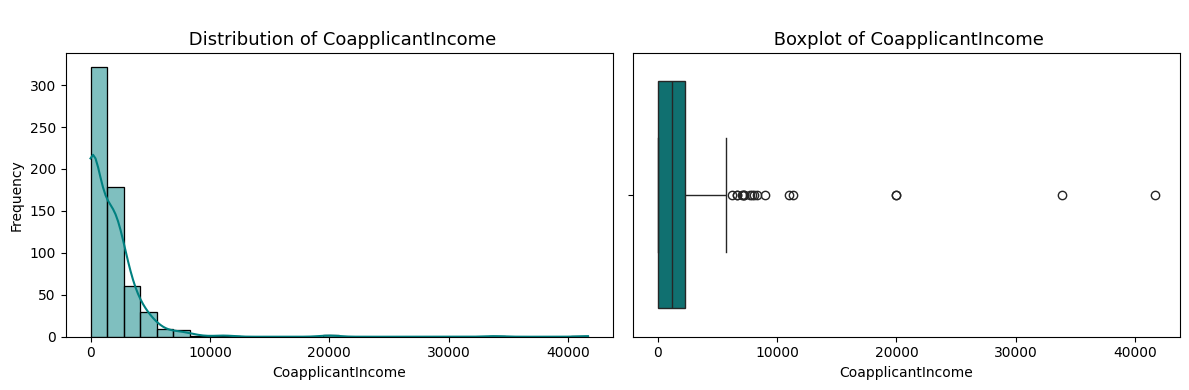


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   145.752443
std     84.107233
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    700.000000

Skewness: 2.743
Kurtosis: 10.937


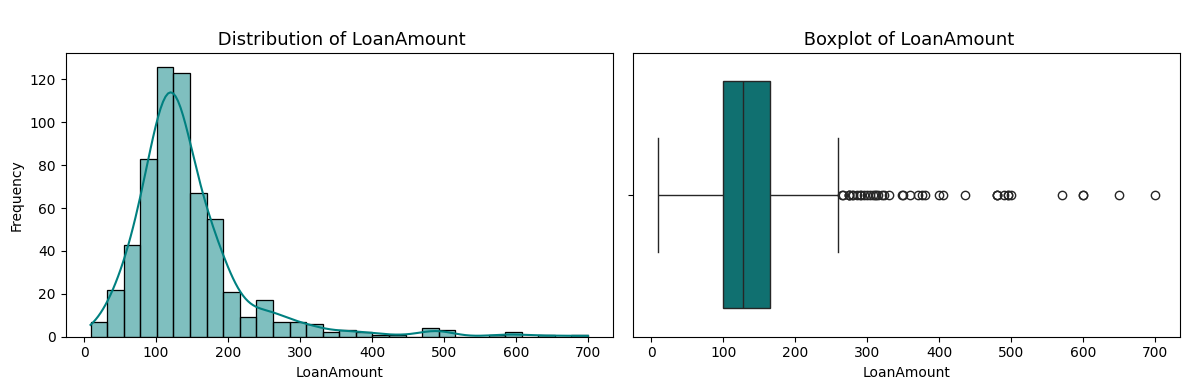


 LoanAmount is highly skewed. Consider log or Box-Cox transformation.
 Feature: Loan_Amount_Term
       Loan_Amount_Term
count        614.000000
mean         342.410423
std           64.428629
min           12.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000

Skewness: -2.402
Kurtosis: 6.925


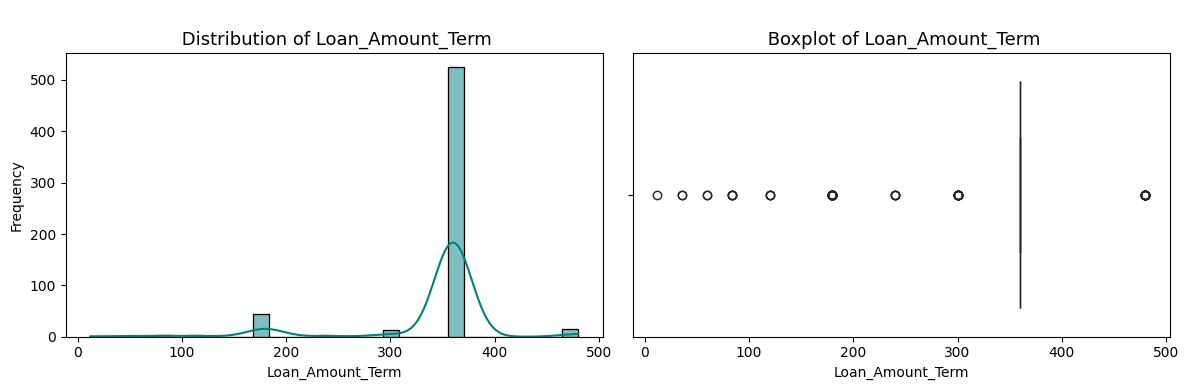


 Loan_Amount_Term is highly skewed. Consider log or Box-Cox transformation.
 Feature: Credit_History
       Credit_History
count      614.000000
mean         0.855049
std          0.352339
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

Skewness: -2.022
Kurtosis: 2.095


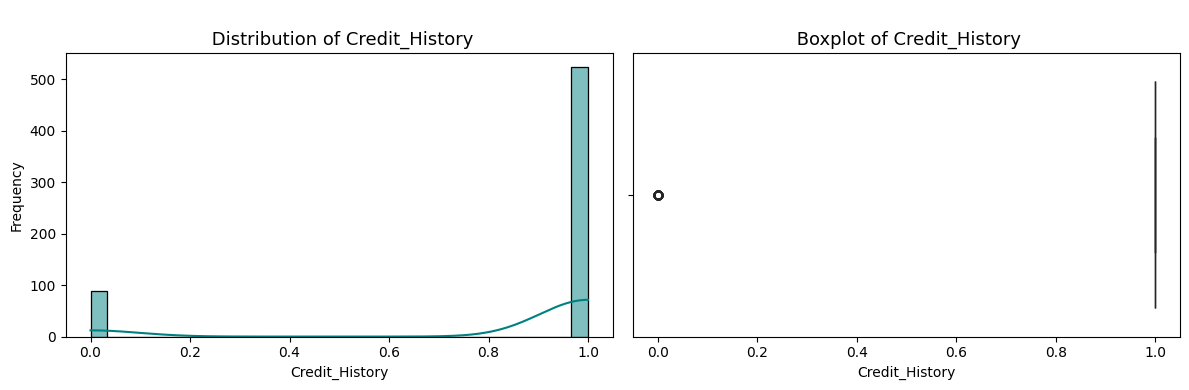


 Credit_History is highly skewed. Consider log or Box-Cox transformation.


In [122]:
for col in num_cols:
    univarte_numerical_eda(df_train, col)

In [123]:
def univaraite_categorical_eda(df, col):
    """Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, a countplot and piechat.
    """
    # Frequency + Proportion
    frq = df[col].value_counts()
    prop = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({"Count":frq, "Percentage":prop.round(2)})
    print(summary)
    print()
    
    
    plt.figure(figsize=(8,5))
    # Vizualization: Barchat
    plt.subplot(1,2,1)
    ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")
    plt.title(f" Distribution(Barchat) of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Count")
    
    
    # Piechat
    plt.subplot(1,2,2)
    df[col].value_counts().plot.pie(autopct="%1.1f%%",startangle=90)
    plt.title(f" Distribution(Piechat) of {col}", fontsize=13)
    
    
      # Annotate each bar with percentage
    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')
        
        
    
    plt.tight_layout()
    plt.show()
    
    
    

        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24



C:\Users\Nababa\AppData\Local\Temp\ipykernel_24496\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


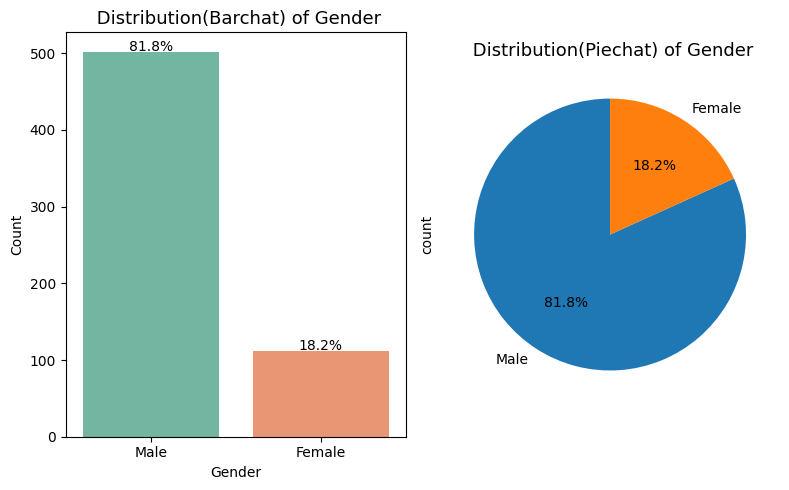

         Count  Percentage
Married                   
Yes        401       65.31
No         213       34.69



C:\Users\Nababa\AppData\Local\Temp\ipykernel_24496\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


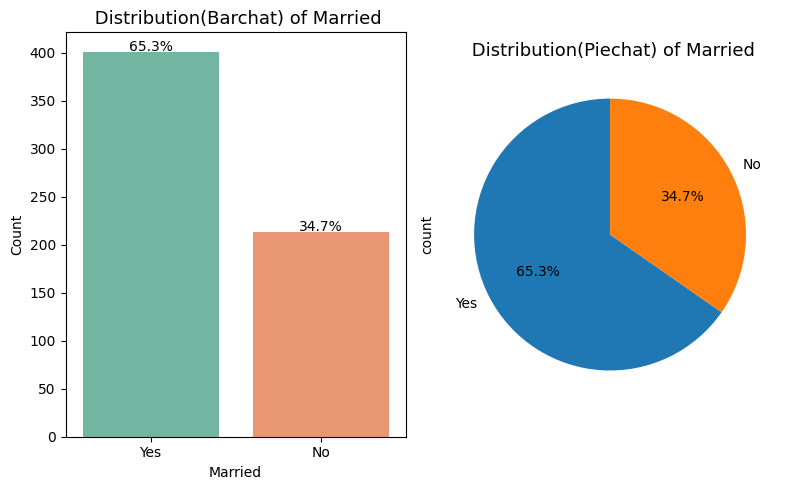

            Count  Percentage
Dependents                   
0             360       58.63
1             102       16.61
2             101       16.45
3+             51        8.31



C:\Users\Nababa\AppData\Local\Temp\ipykernel_24496\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


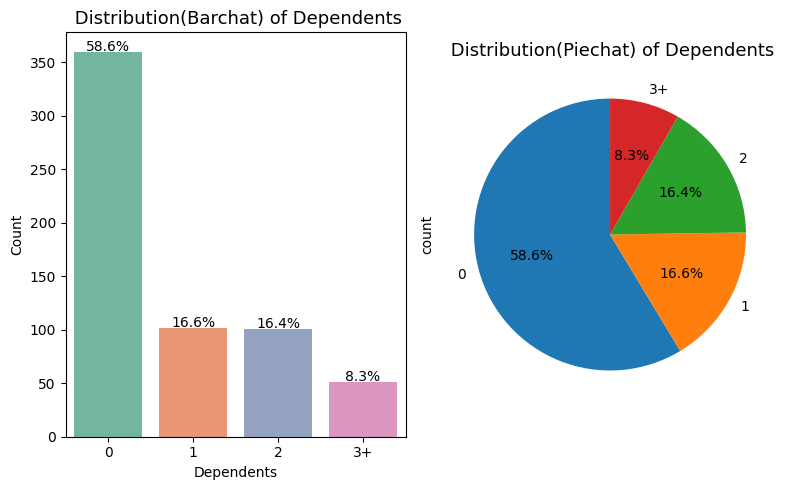

              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82



C:\Users\Nababa\AppData\Local\Temp\ipykernel_24496\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


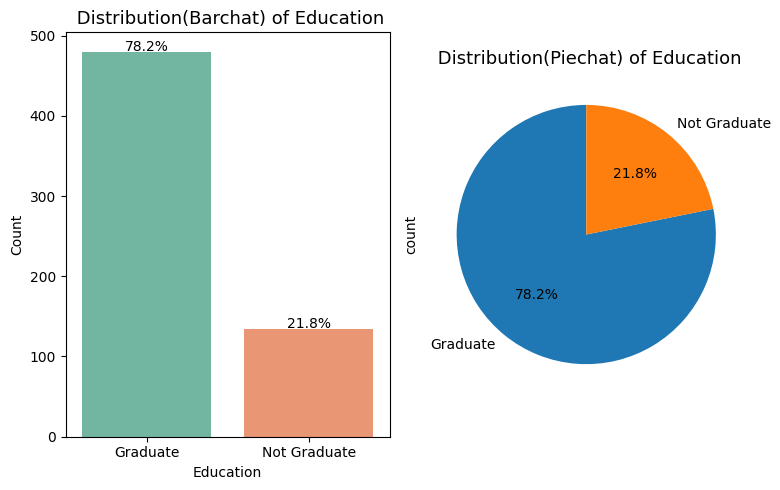

               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36



C:\Users\Nababa\AppData\Local\Temp\ipykernel_24496\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


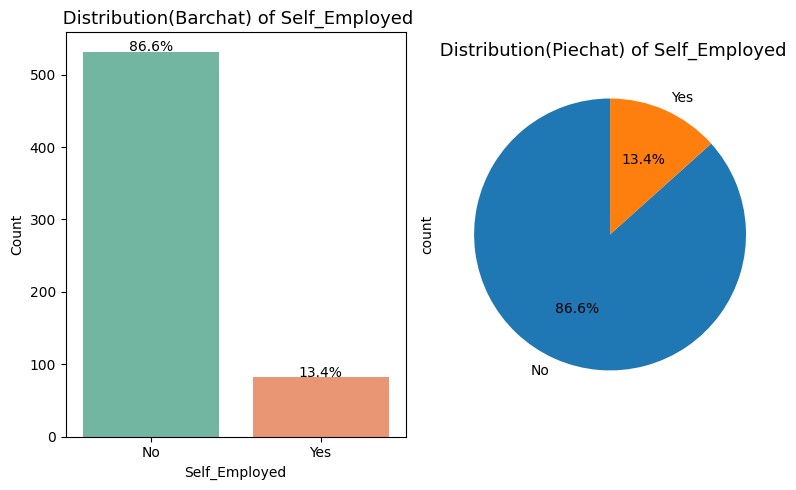

               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15



C:\Users\Nababa\AppData\Local\Temp\ipykernel_24496\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


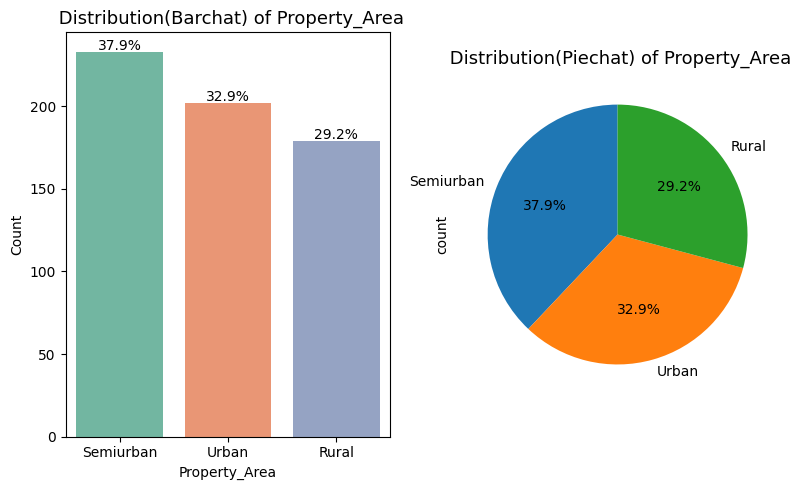

             Count  Percentage
Loan_Status                   
Y              422       68.73
N              192       31.27



C:\Users\Nababa\AppData\Local\Temp\ipykernel_24496\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


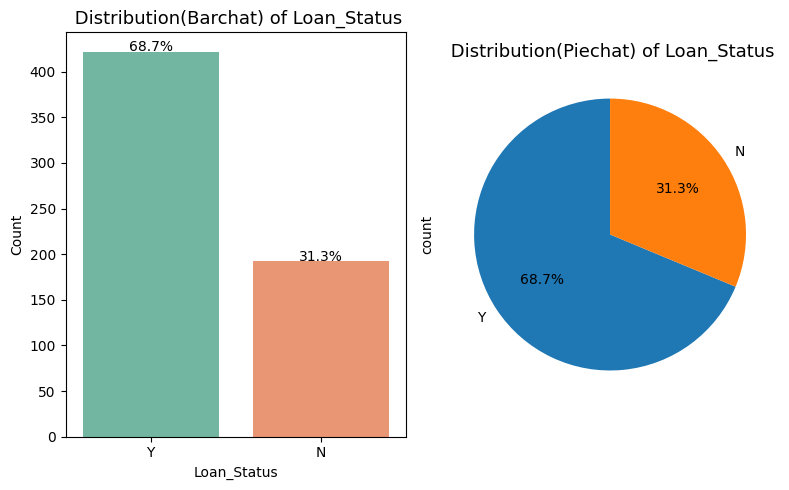

In [124]:
for col in cat_cols:
    univaraite_categorical_eda(df_train, col)

----------------------------------------------------------------
 ### **2. Bivariate analysis**
 ---------------------------------------------------------------

In [125]:
# Lets find the numerical features
num_cols = df_train.select_dtypes(include=["float64","int64"]).columns

num_features = pd.DataFrame(df_train[num_cols])
num_features.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP001002,5849,0.0,128.0,360.0,1.0
LP001003,4583,1508.0,128.0,360.0,1.0
